In [21]:
file_cnn_long_in = open(r'C:\Users\Luba Tovbin\Desktop\MS_CMPE\CMPE-295B\CNN_long\inputs-210000-.dev.txt',
                        'r', encoding="mbcs")
file_cnn_long_out = open(r'C:\Users\Luba Tovbin\Desktop\MS_CMPE\CMPE-295B\CNN_long\predictions-210000-.dev.txt',
                         'r', encoding="mbcs")

file_cnn_short_in = open(r'C:\Users\Luba Tovbin\Desktop\MS_CMPE\CMPE-295B\CNN_short\inputs-210000-.dev.txt',
                        'r', encoding="mbcs")
file_cnn_short_out = open(r'C:\Users\Luba Tovbin\Desktop\MS_CMPE\CMPE-295B\CNN_short\predictions-210000-.dev.txt',
                         'r', encoding="mbcs")

long_in   = file_cnn_long_in.readlines()
long_out  = file_cnn_long_out.readlines()
short_in  = file_cnn_short_in.readlines()
short_out = file_cnn_short_out.readlines()

file_cnn_long_in.close()
file_cnn_long_out.close()
file_cnn_short_in.close()
file_cnn_short_out.close()

In [37]:
# create inputs for long
with open(r'C:\Users\Luba Tovbin\Desktop\MS_CMPE\CMPE-295B\CNN_long\cnn_inputs_long.txt',
          'w', encoding="mbcs") as f:
    for line in long_in:
        if line[0] != '-' and line[0] != '[':
            f.write('Long. ' + line)        

In [38]:
# create outputs for long
# here, one output may contain the new line characters. We have to preprocess, so each entry is one line.
line2write = ''
with open(r'C:\Users\Luba Tovbin\Desktop\MS_CMPE\CMPE-295B\CNN_long\cnn_outputs_long.txt',
          'w', encoding="mbcs") as f:
    for line in long_out:
        if line[0] == '-':
            f.write(line2write)
            line2write = ''
        else:
            line2write = line2write.strip('\n') + ' ' + line   
    f.write(line2write)

In [39]:
# create inputs for short
with open(r'C:\Users\Luba Tovbin\Desktop\MS_CMPE\CMPE-295B\CNN_short\cnn_inputs_short.txt',
          'w', encoding="mbcs") as f:
    for line in short_in:
        if line[0] != '-' and line[0] != '[':
            f.write('Short. ' + line)

In [40]:
# create outputs for short
line2write = ''
with open(r'C:\Users\Luba Tovbin\Desktop\MS_CMPE\CMPE-295B\CNN_short\cnn_outputs_short.txt',
          'w', encoding="mbcs") as f:
    for line in short_out:
        if line[0] == '-':
            f.write(line2write)
            line2write = ''
        else:
            line2write = line2write.strip('\n') + ' ' + line   
    f.write(line2write)

In [41]:
file_cnn_long_in = open(r'C:\Users\Luba Tovbin\Desktop\MS_CMPE\CMPE-295B\CNN_long\cnn_inputs_long.txt',
                        'r', encoding="mbcs")
file_cnn_long_out = open(r'C:\Users\Luba Tovbin\Desktop\MS_CMPE\CMPE-295B\CNN_long\cnn_outputs_long.txt',
                         'r', encoding="mbcs")

file_cnn_short_in = open(r'C:\Users\Luba Tovbin\Desktop\MS_CMPE\CMPE-295B\CNN_short\cnn_inputs_short.txt',
                        'r', encoding="mbcs")
file_cnn_short_out = open(r'C:\Users\Luba Tovbin\Desktop\MS_CMPE\CMPE-295B\CNN_short\cnn_outputs_short.txt',
                         'r', encoding="mbcs")

l_in   = file_cnn_long_in.readlines()
l_out  = file_cnn_long_out.readlines()
s_in  = file_cnn_short_in.readlines()
s_out = file_cnn_short_out.readlines()

file_cnn_long_in.close()
file_cnn_long_out.close()
file_cnn_short_in.close()
file_cnn_short_out.close()

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
len(l_out)

1000

In [44]:
l_out[0]

" Sally Forrest, an actress-dancer who graced the silver screen throughout the '40s and '50s in MGM musicals and films such as the 1956 noir While the City Sleeps died on March 15 at her home in Beverly Hills, California .\n"

In [45]:
len(l_out[0])

222

In [46]:
l_out_len = [len(x.split(' ')) for x in l_out]
s_out_len = [len(x.split(' ')) for x in s_out]

In [47]:
import statistics

statistics.mean(l_out_len)

62.433

In [48]:
statistics.mean(s_out_len)

37.546

(array([  9.,  44.,  59.,  66., 106., 130., 216., 189., 141.,  40.]),
 array([ 5. , 10.4, 15.8, 21.2, 26.6, 32. , 37.4, 42.8, 48.2, 53.6, 59. ]),
 <BarContainer object of 10 artists>)

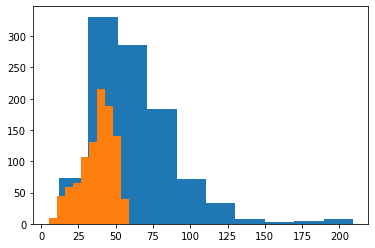

In [49]:
plt.hist(l_out_len)
plt.hist(s_out_len)

906

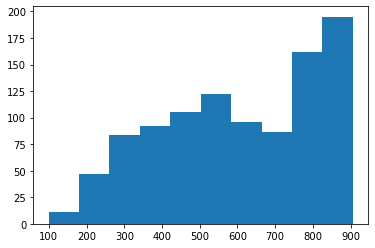

In [51]:
l_in_len = [len(x.split(' ')) for x in l_in]
s_in_len = [len(x.split(' ')) for x in s_in]
plt.hist(l_in_len)
#plt.hist(s_in_len)
max(l_in_len)

In [52]:
l_df = pd.DataFrame({'text':l_in, 'target':l_out})
s_df = pd.DataFrame({'text':s_in, 'target':s_out})

In [53]:
l_df.head()

,text,target
0,"Long. Sally Forrest, an actress-dancer who gra...","Sally Forrest, an actress-dancer who graced t..."
1,Long. A middle-school teacher in China has ink...,"Wang Lian, 35, has drawn hundreds of drawings..."
2,Long. A man convicted of killing the father an...,"Iftekhar Murtaza, 30, was sentenced for the m..."
3,Long. Avid rugby fan Prince Harry could barely...,The fourth-in-line to the throne squirmed in ...
4,Long. A Triple M Radio producer has been inund...,Triple M Radio producer Nick Slater was flood...


In [58]:
l_df['length']=l_df['text'].str.slice(0,5)

In [59]:
l_df.head()

,text,target,length
0,"Long. Sally Forrest, an actress-dancer who gra...","Sally Forrest, an actress-dancer who graced t...",Long.
1,Long. A middle-school teacher in China has ink...,"Wang Lian, 35, has drawn hundreds of drawings...",Long.
2,Long. A man convicted of killing the father an...,"Iftekhar Murtaza, 30, was sentenced for the m...",Long.
3,Long. Avid rugby fan Prince Harry could barely...,The fourth-in-line to the throne squirmed in ...,Long.
4,Long. A Triple M Radio producer has been inund...,Triple M Radio producer Nick Slater was flood...,Long.


In [60]:
l_df['length'].unique()

array(['Long.'], dtype=object)

In [62]:
l_df['text_len']= [ len(x.split(' ')) for x in l_df['text']]

In [63]:
l_df.head()

,text,target,length,text_len
0,"Long. Sally Forrest, an actress-dancer who gra...","Sally Forrest, an actress-dancer who graced t...",Long.,265
1,Long. A middle-school teacher in China has ink...,"Wang Lian, 35, has drawn hundreds of drawings...",Long.,552
2,Long. A man convicted of killing the father an...,"Iftekhar Murtaza, 30, was sentenced for the m...",Long.,466
3,Long. Avid rugby fan Prince Harry could barely...,The fourth-in-line to the throne squirmed in ...,Long.,581
4,Long. A Triple M Radio producer has been inund...,Triple M Radio producer Nick Slater was flood...,Long.,339


In [66]:
s_df['length']=s_df['text'].str.slice(0,6)
s_df.head()

,text,target,length
0,"Short. Sally Forrest, an actress-dancer who gr...","Sally Forrest, whose birth name was Katherine...",Short.
1,Short. A middle-school teacher in China has in...,"Politics teacher Wang Lian, 35, has created 1...",Short.
2,Short. A man convicted of killing the father a...,"Iftekhar Murtaza, 30, was sentenced to death ...",Short.
3,Short. Avid rugby fan Prince Harry could barel...,Fourth-in-line to the throne squirmed in his ...,Short.
4,Short. A Triple M Radio producer has been inun...,Triple M producer Nick Slater was flooded wit...,Short.


In [67]:
s_df['length'].unique()

array(['Short.'], dtype=object)

In [68]:
l=[1,3]
l[:10]

[1, 3]